In [24]:
from __future__ import print_function, division

%matplotlib inline
#%matplotlib notebook

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [25]:
df = pd.read_csv('C:/Users/Trypt/Desktop/KBB/DB files/car_data_clean_complete_v4.csv')
df2 = pd.read_csv('C:/Users/Trypt/Desktop/KBB/DB files/NewCarData_clean.csv')

In [26]:
df = df.rename(index=str, columns={"vin_ss": "vin", "price_fs": "price", "miles_fs": "miles", "year_is": "year", "make_ss": "make", "model_ss": "model", "trim_ss": "trim", "vehicle_type_ss": "vehicle_type", "body_type_ss": "body_type", "drivetrain_ss": "drivetrain", "engine_ss":"engine", "engine_size_ss": "engine_size", "transmission_ss": "transmission", "doors_is": "doors", "cylinders_is": "cylinders", "interior_color_ss": "interior_color", "exterior_color_ss": "exterior_color", "zip_is": "zip", "dom_is": "dom", "dom_180_is": "dom_180", "msrp_fs": "msrp", "dom_active_is": "dom_active", "is_certified_is": "is_certified", "fuel_type_ss": "fuel_type", "scraped_at_dts": "scraped_at", "status_date_dts": "status_date"})
df.columns

Index(['id', 'vin', 'price', 'miles', 'stock_no_ss', 'year', 'make', 'model',
       'trim', 'vehicle_type', 'body_type', 'drivetrain', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'dom', 'dom_180', 'msrp', 'dom_active',
       'is_certified', 'fuel_type', 'scraped_at', 'status_date', 'city_ss',
       'state_ss', 'AGE', 'zip', 'type', 'decommissioned', 'primary_city',
       'state', 'county', 'timezone', 'latitude', 'longitude',
       'irs_estimated_population_2015', 'county full', 'State short',
       'Per Capita income', 'Median Household income', 'Median Family income',
       'Population', 'Number of households', 'State full', 'Regions'],
      dtype='object')

In [27]:
df2.columns

Index(['id', 'vin', 'price', 'miles', 'year', 'make', 'model', 'trim',
       'vehicle_type', 'body_type', 'drivetrain', 'fuel_type', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'interior_color',
       'exterior_color', 'scraped_at', 'status_date', 'zip', 'is_certified',
       'dom', 'dom_180', 'msrp', 'dom_active', 'Rank', 'County', 'State short',
       'Per Capita income', 'Median Household income', 'Median Family income',
       'Population', 'Number of households', 'State full', 'States Short',
       'States', 'Regions', 'type', 'decommissioned', 'primary_city', 'state',
       'county', 'timezone', 'latitude', 'longitude',
       'irs_estimated_population_2015', 'county full', 'YEAR', 'AGE'],
      dtype='object')

In [28]:
df.shape

(1673470, 49)

In [29]:
df2.shape

(336511, 51)

In [30]:
df.isnull().sum()

id                               0
vin                              0
price                            0
miles                            0
stock_no_ss                      0
year                             0
make                             0
model                            0
trim                             0
vehicle_type                     0
body_type                        0
drivetrain                       0
engine                           0
engine_size                      0
transmission                     0
doors                            0
cylinders                        0
interior_color                   0
exterior_color                   0
dom                              0
dom_180                          0
msrp                             0
dom_active                       0
is_certified                     0
fuel_type                        0
scraped_at                       0
status_date                      0
city_ss                          0
state_ss            

In [31]:
df2.isnull().sum()

id                               0
vin                              0
price                            0
miles                            0
year                             0
make                             0
model                            0
trim                             0
vehicle_type                     0
body_type                        0
drivetrain                       0
fuel_type                        0
engine                           0
engine_size                      0
transmission                     0
doors                            0
cylinders                        0
interior_color                   0
exterior_color                   0
scraped_at                       0
status_date                      0
zip                              0
is_certified                     0
dom                              0
dom_180                          0
msrp                             0
dom_active                       0
Rank                             0
County              

In [32]:
df1 = df

In [33]:
df3 = [df1, df2]
df = pd.concat(df3)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

C:\Users\Trypt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


AGE                                    0
County                           1673470
Median Family income                   0
Median Household income                0
Number of households                   0
Per Capita income                      0
Population                             0
Rank                             1673470
Regions                                0
State full                             0
State short                            0
States                           1673470
States Short                     1673470
YEAR                             1673470
body_type                              0
city_ss                           336511
county                                 0
county full                            0
cylinders                              0
decommissioned                         0
dom                                    0
dom_180                                0
dom_active                             0
doors                                  0
drivetrain      

In [34]:
df = df.drop(columns=['County', 'Rank', 'States', 'States Short', 'YEAR', 'city_ss', 'state_ss', 'stock_no_ss'])
df.isnull().sum()

AGE                              0
Median Family income             0
Median Household income          0
Number of households             0
Per Capita income                0
Population                       0
Regions                          0
State full                       0
State short                      0
body_type                        0
county                           0
county full                      0
cylinders                        0
decommissioned                   0
dom                              0
dom_180                          0
dom_active                       0
doors                            0
drivetrain                       0
engine                           0
engine_size                      0
exterior_color                   0
fuel_type                        0
id                               0
interior_color                   0
irs_estimated_population_2015    0
is_certified                     0
latitude                         0
longitude           

In [35]:
df.shape

(2009981, 46)

In [53]:
df = df.drop(df[df["make"] == "Panoz"].index | df[df["make"] == "Daewoo"].index | df[df["make"] == "Maybach"].index | df[df["make"] == "AM General"].index | df[df["make"] == "Geo"].index | df[df["make"] == "Fisker"].index | df[df["make"] == "Alfa Romeo"].index | df[df["make"] == "Lotus"].index | df[df["make"] == "McLaren"].index | df[df["make"] == "Plymouth"].index | df[df["make"] == "Isuzu"].index | df[df["make"] == "Oldsmobile"].index | df[df["make"] == "Lamborghini"].index | df[df["make"] == "Rolls-Royce"].index | df[df["make"] == "Aston Martin"].index | df[df["make"] == "Saab"].index | df[df["make"] == "smart"].index | df[df["make"] == "Suzuki"].index | df[df["make"] == "Infiniti"].index | df[df["make"] == "Ferrari"].index | df[df["make"] == "Bentley"].index | df[df["make"] == "Maserati"].index | df[df["make"] == "HUMMER"].index | df[df["make"] == "Mercury"].index | df[df["make"] == "Saturn"].index | df[df["make"] == "FIAT"].index | df[df["make"] == "Pontiac"].index | df[df["make"] == "Jaguar"].index | df[df["make"] == "Scion"].index | df[df["make"] == "Mitsubishi"].index | df[df["make"] == "Porsche"].index | df[df["make"] == "Volvo"].index | df[df["make"] == "MINI"].index | df[df["make"] == "Land Rover"].index | df[df["make"] == "Lincoln"].index | df[df["make"] == "Fiat"].index)
expcars = (df['price'] > 5000) & (df['price'] < 60000)
df = df[expcars]
df = df.drop_duplicates(['price', 'miles', 'year', 'make', 'model', 'trim', 
       'engine_size',  'cylinders', 'interior_color', 
       'exterior_color', 'zip', 'msrp', 'is_certified', 'fuel_type', 'state', 
                     'AGE', 'Regions', 'Population', 'Median Family income'])
df.shape

(1621364, 46)

In [54]:
df["make"].value_counts().sort_values(ascending = False)

Chevrolet        216438
Ford             199059
Toyota           146485
Nissan           124160
Honda            121278
Jeep              87339
BMW               75561
Lexus             74877
Hyundai           67654
GMC               62161
Dodge             51440
Mercedes-Benz     51235
Kia               48268
Volkswagen        44190
Ram               42226
Acura             33655
Subaru            30606
Mazda             28306
Cadillac          27882
Buick             26684
Audi              22778
INFINITI          19682
Chrysler          19400
Name: make, dtype: int64

In [55]:
states = pd.DataFrame(df.groupby('State full').median())
states = states.reset_index()

In [56]:
df["State full"].value_counts().sort_values(ascending = False)

North Carolina    181042
Florida           130070
California        129212
Texas             118210
Georgia            84958
Pennsylvania       79167
New York           72363
Ohio               71003
Virginia           67638
Illinois           57045
Michigan           50892
South Carolina     50206
Wisconsin          48639
Tennessee          45297
Maryland           42012
Indiana            35415
Missouri           35115
Kansas             24971
Washington         24680
Minnesota          24591
Kentucky           24456
Alabama            23921
Colorado           23564
Iowa               19028
Arizona            16621
Oklahoma           14581
Nebraska           14308
Oregon             13455
Arkansas           12484
Utah               11964
Mississippi        10830
Louisiana          10026
Delaware            8489
Nevada              8025
Idaho               6578
West Virginia       4869
South Dakota        4524
New Mexico          4013
Massachusetts       3625
North Dakota        3481


In [57]:
statesmean = pd.DataFrame(df.groupby('State full').mean())
statesmean = statesmean.reset_index()

In [58]:
states["mean"] = statesmean['price']

In [59]:
sns.set(font_scale=2, rc={'figure.figsize':(18, 18)})

## Mean Vehicle Price by State

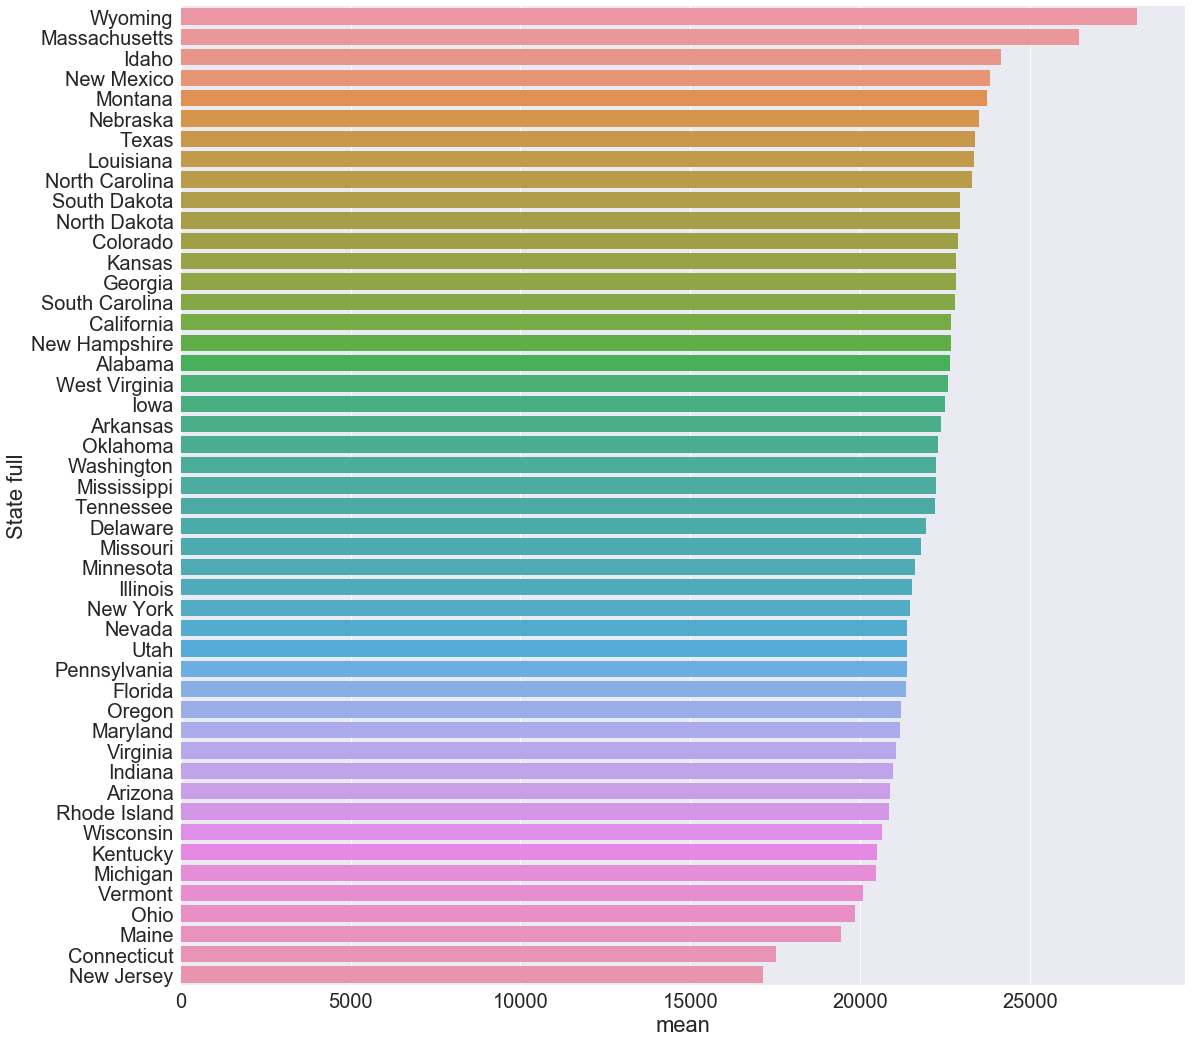

In [60]:
states.sort_values('mean', ascending=False, inplace=True)
sns.barplot(x="mean", y="State full", data=states, label="Mean")

## Median Vehicle Price by State

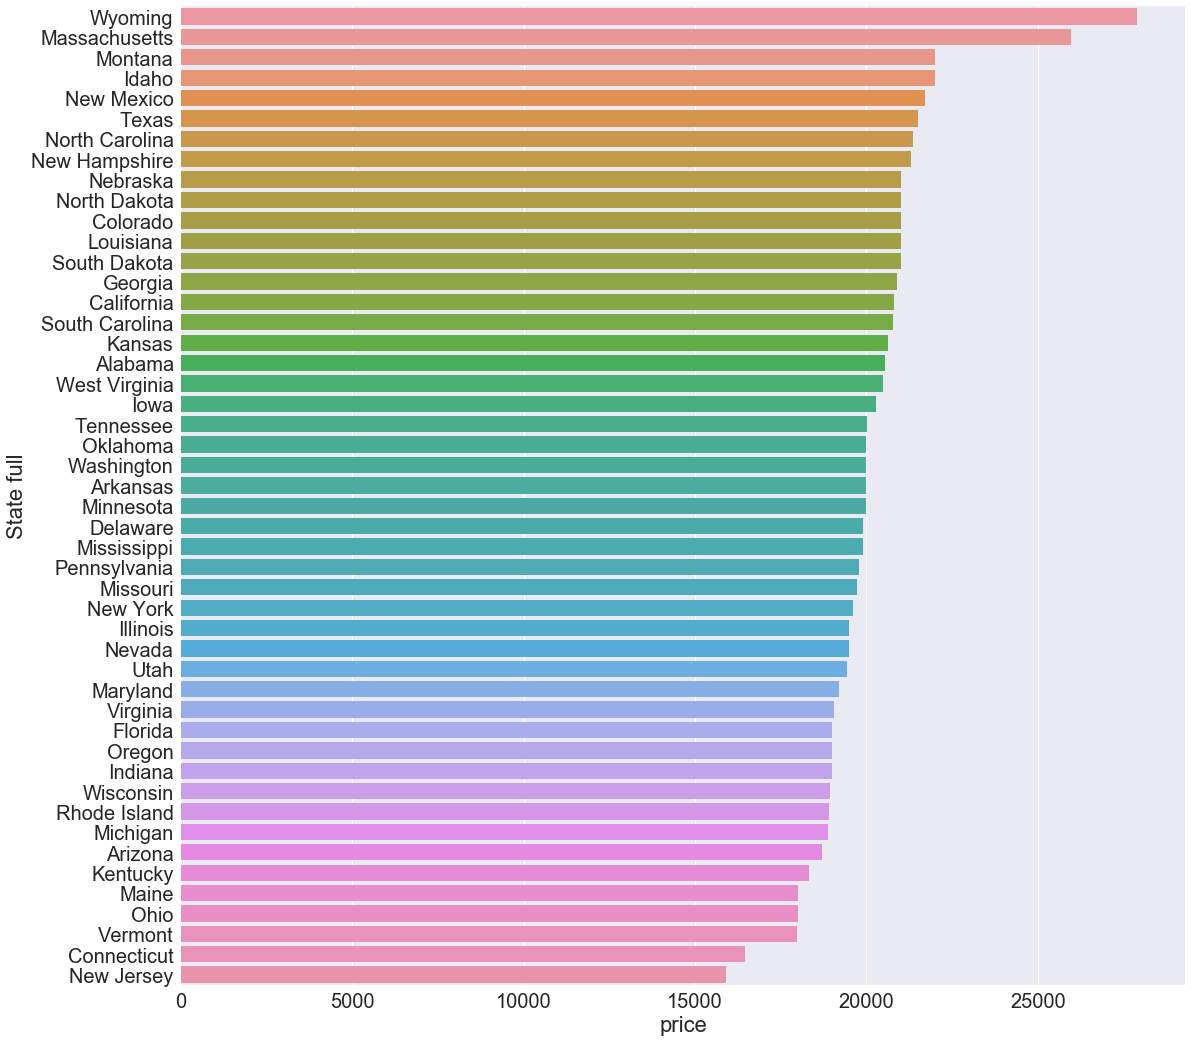

In [61]:
states.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=states, label="Median")

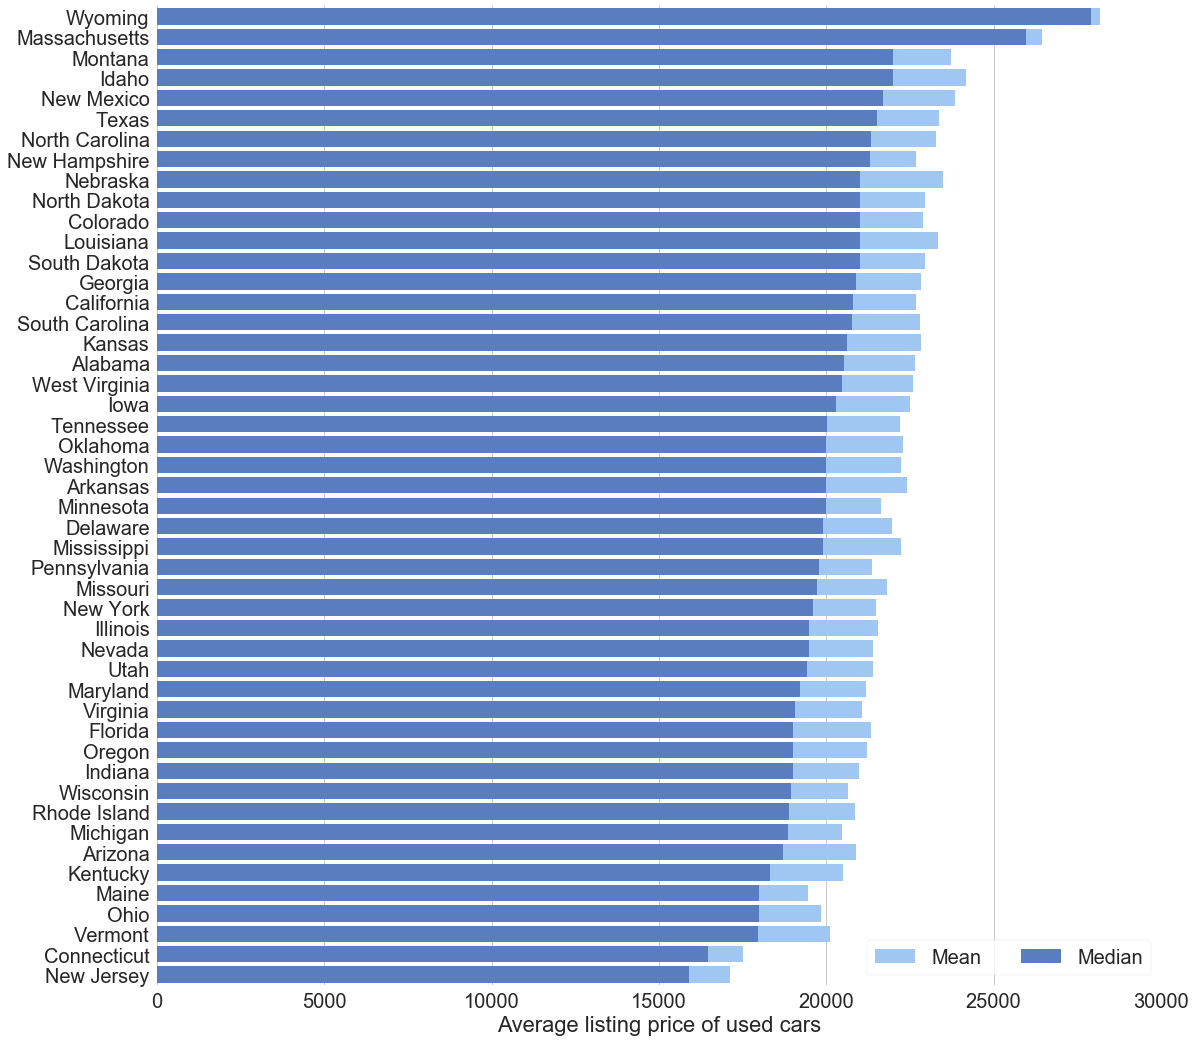

In [62]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 18))
sns.set_color_codes("pastel")
sns.barplot(x="mean", y="State full", data=states, label="Mean", color="b")

sns.set_color_codes("muted")
sns.barplot(x="price", y="State full", data=states, label="Median", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,30000), ylabel="", xlabel="Average listing price of used cars")
sns.despine(left=True, bottom=True)

In [64]:
chevy = df[(df["make"] == "Chevrolet")]
chevy = pd.DataFrame(chevy.groupby('State full').median())
chevy = chevy.reset_index()

ford = df[(df["make"] == "Ford")]
ford = pd.DataFrame(ford.groupby('State full').median())
ford = ford.reset_index()

toyota = df[(df["make"] == "Toyota")]
toyota = pd.DataFrame(toyota.groupby('State full').median())
toyota = toyota.reset_index()

nissan = df[(df["make"] == "Nissan")]
nissan = pd.DataFrame(nissan.groupby('State full').median())
nissan = nissan.reset_index()

honda = df[(df["make"] == "Honda")]
honda = pd.DataFrame(honda.groupby('State full').median())
honda = honda.reset_index()

## Chevy Median price by State

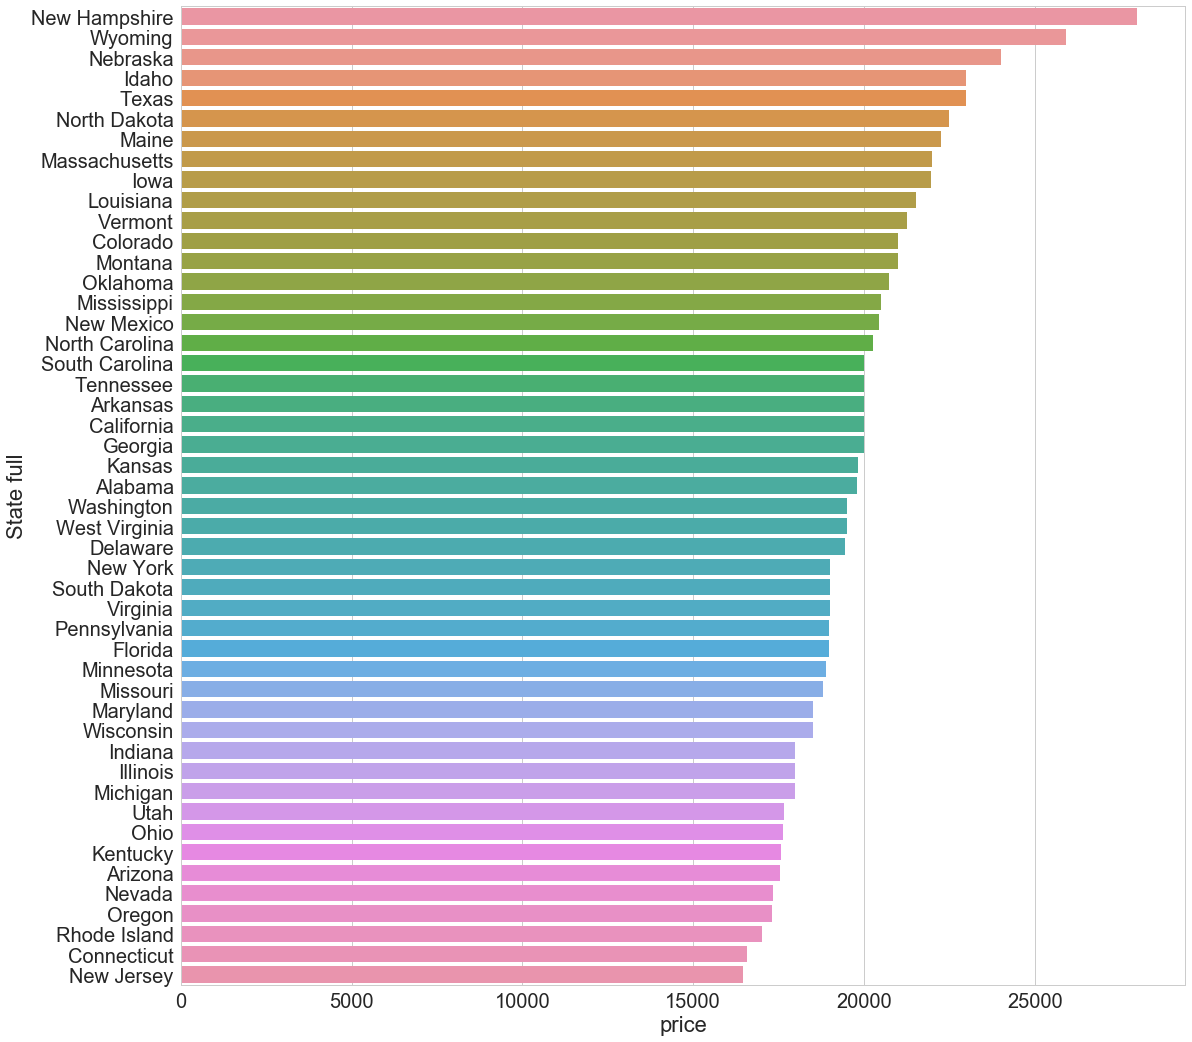

In [66]:
chevy.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=chevy, label="Median")

## Ford Median price by State

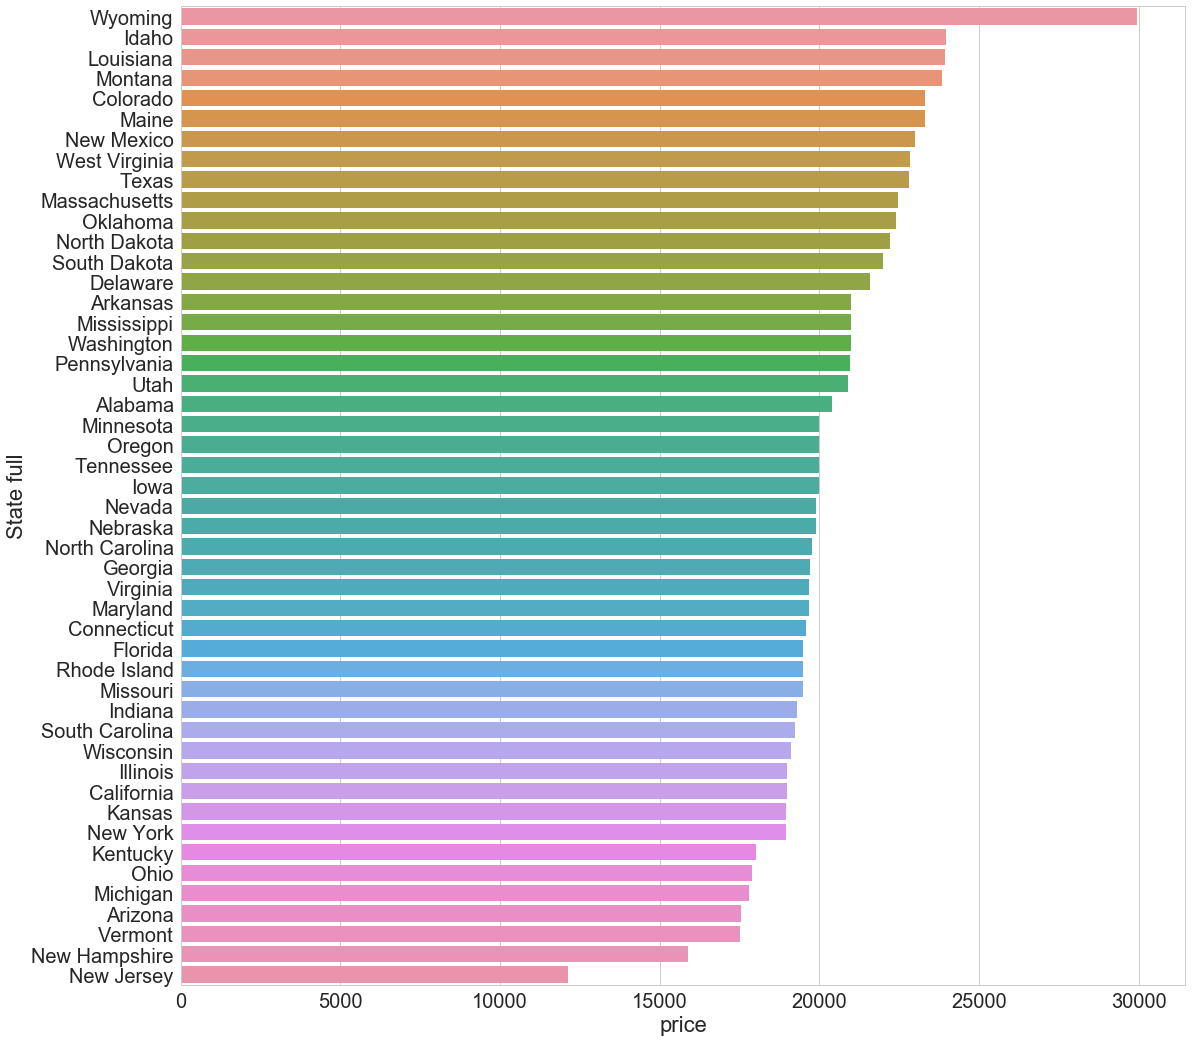

In [67]:
ford.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=ford, label="Median")

## Toyota Median price by State

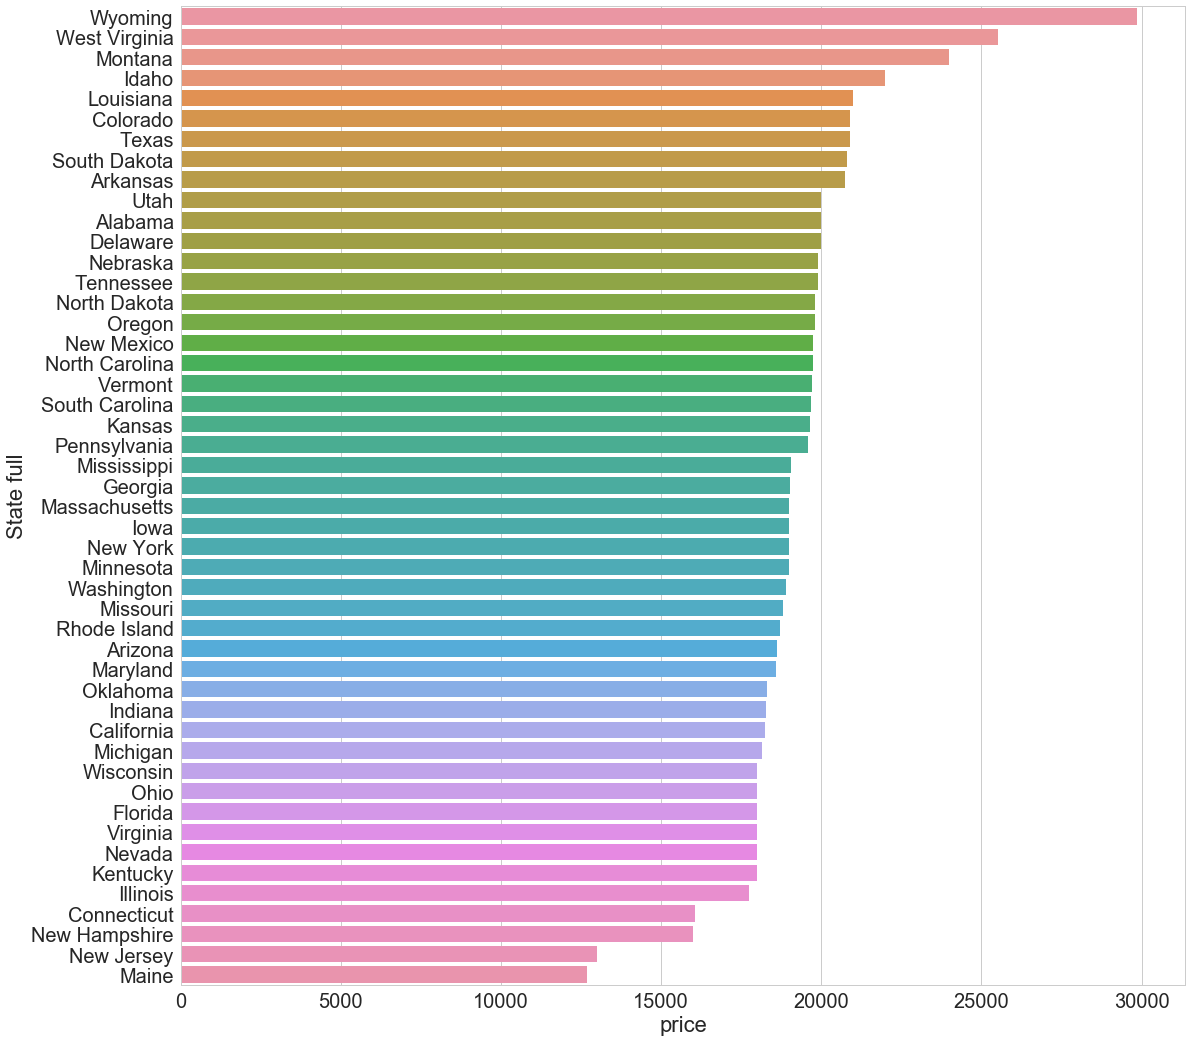

In [68]:
toyota.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=toyota, label="Median")

## Nissan Median price by State

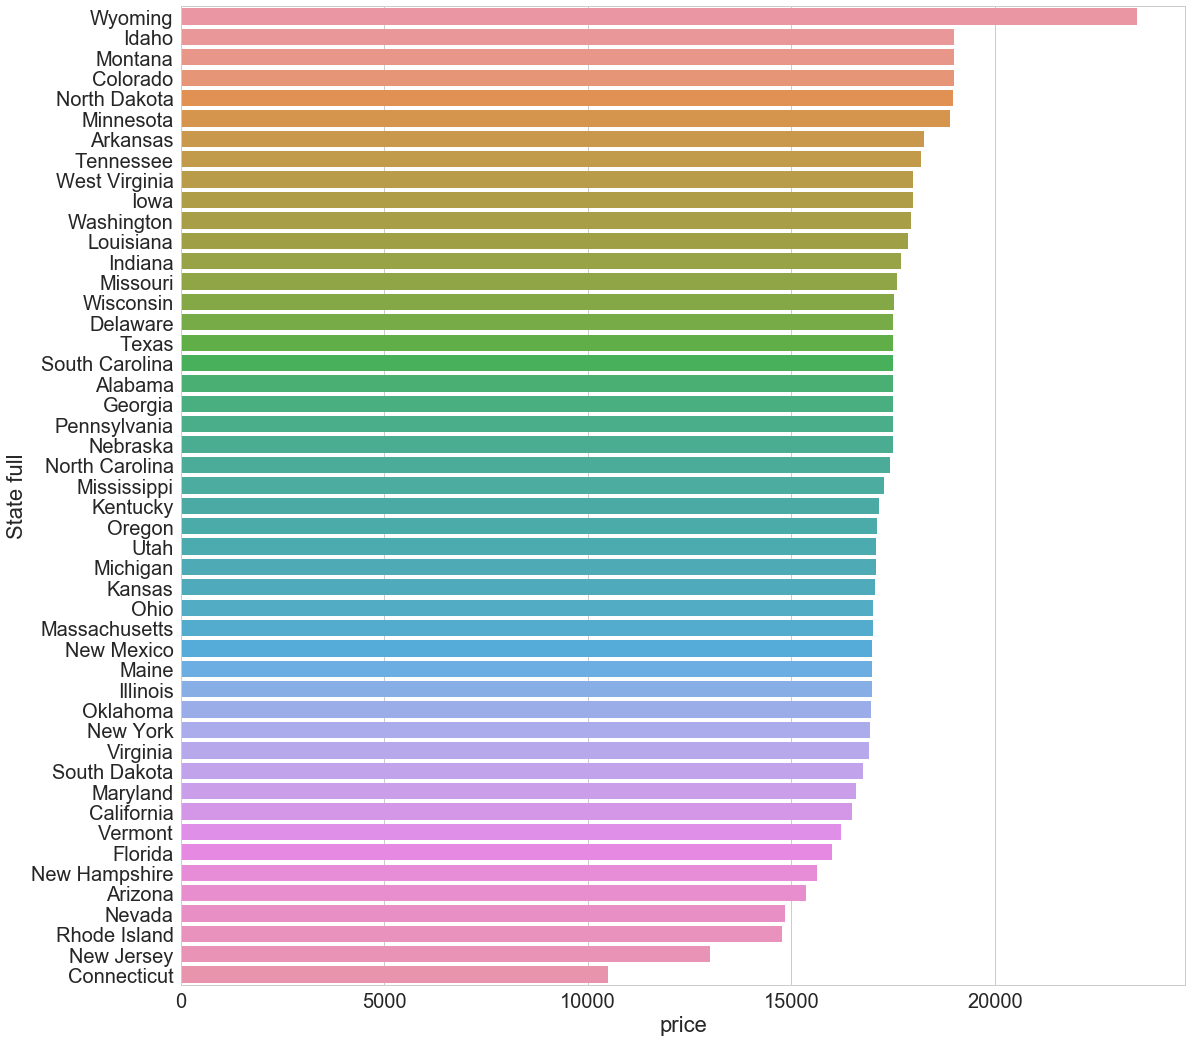

In [69]:
nissan.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=nissan, label="Median")

## Honda Median price by State

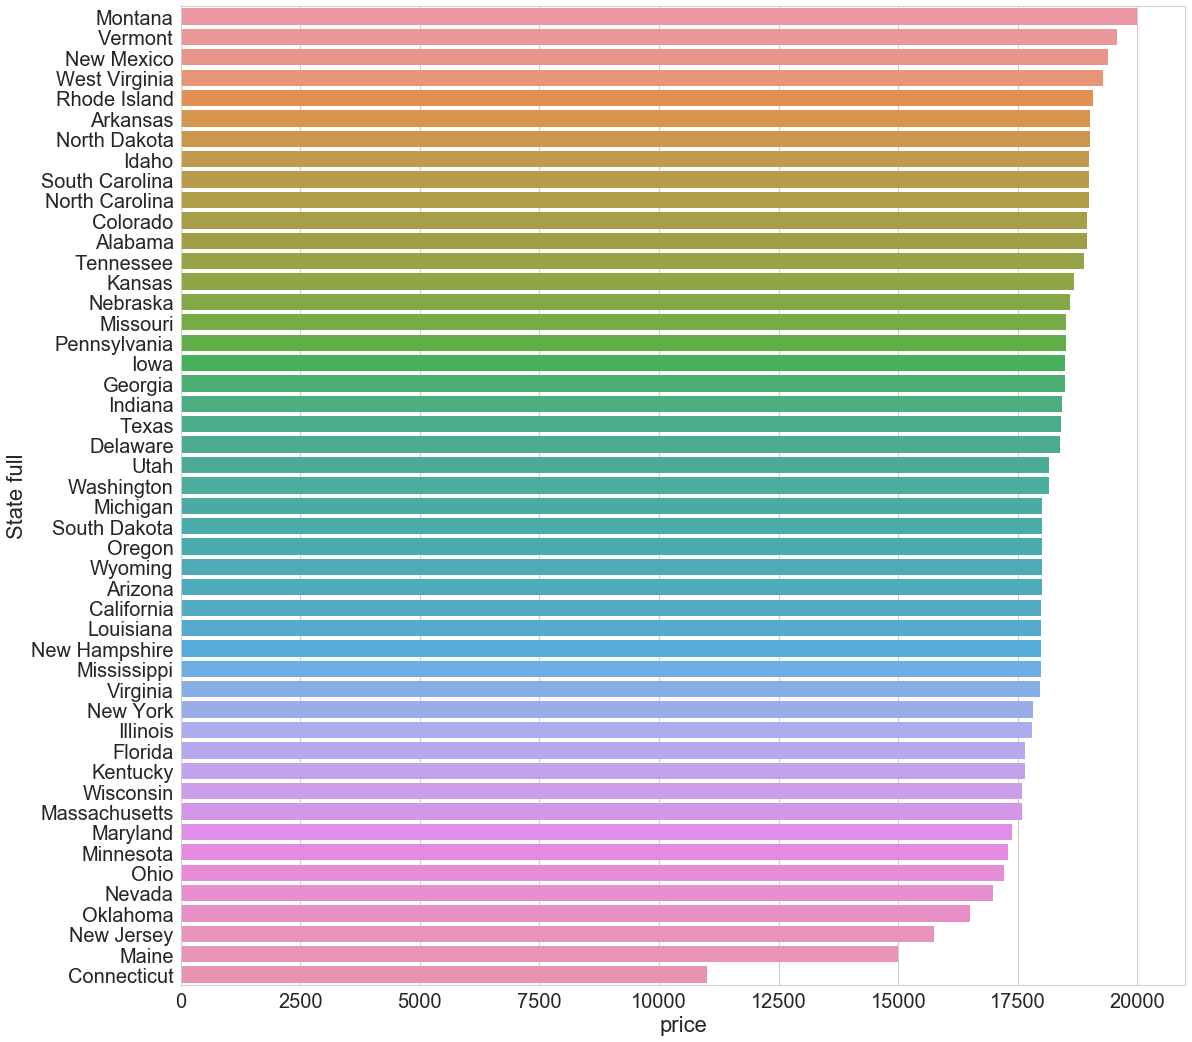

In [70]:
honda.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=honda, label="Median")

## Vehicle counts by State broken in Types

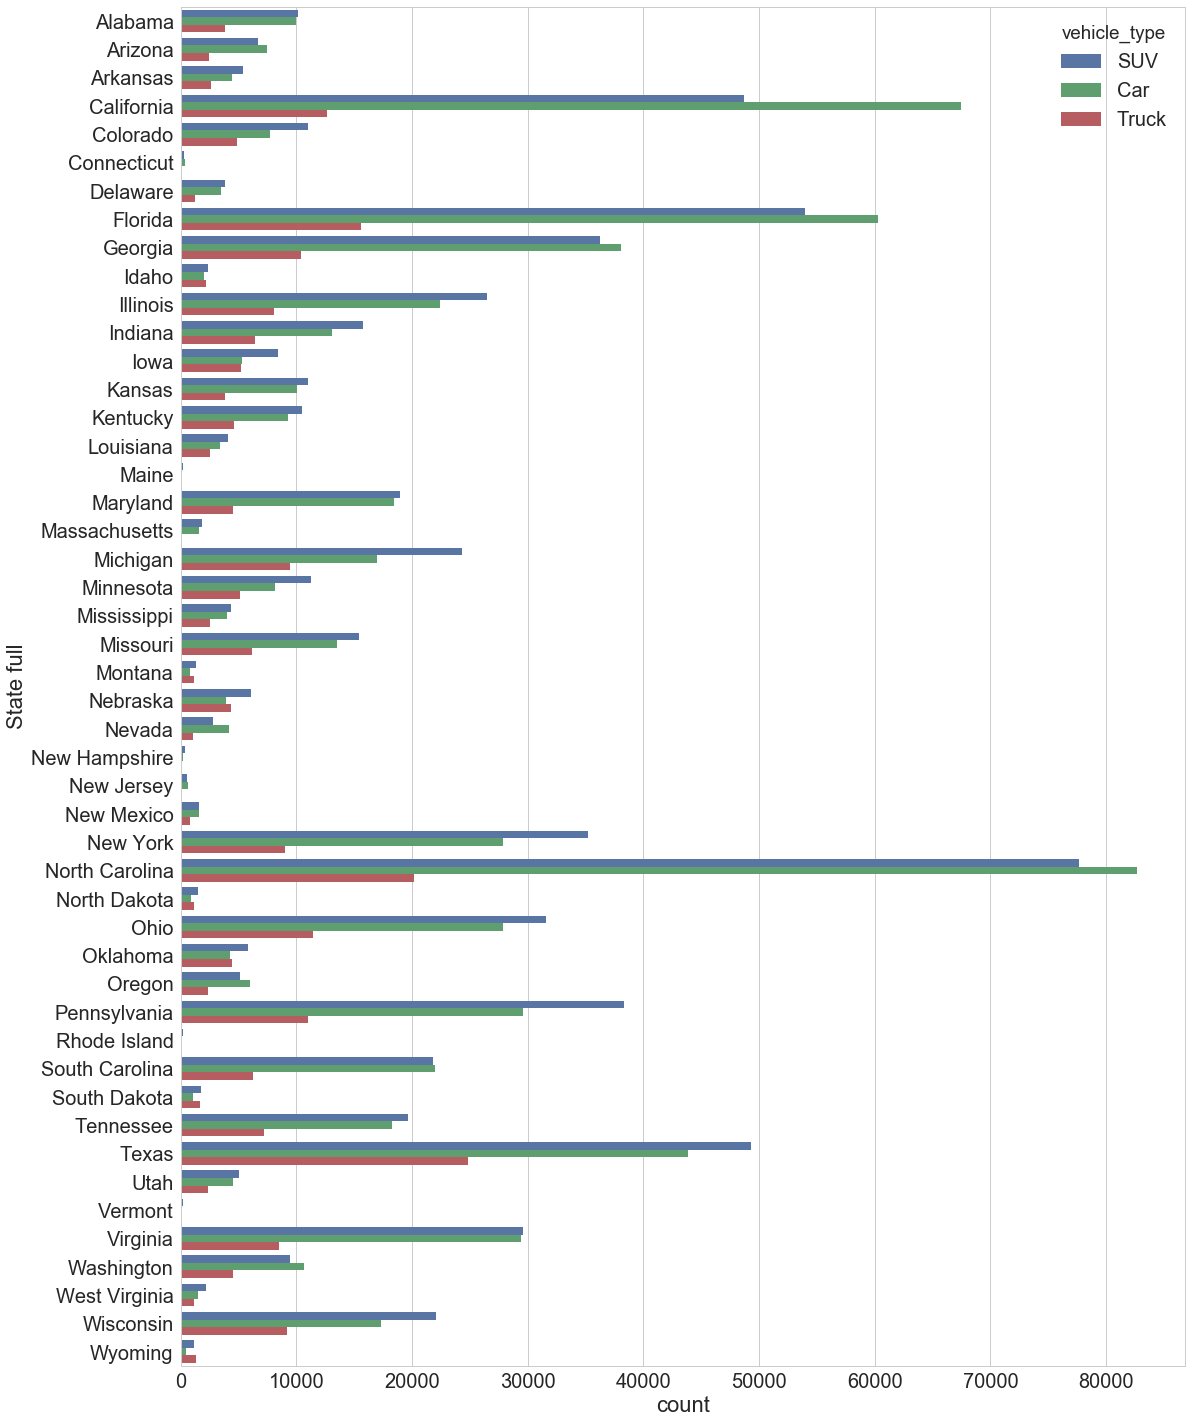

In [205]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 25))
vehiclecount = df.sort_values('State full', ascending=True, inplace=False)
vehiclecount = vehiclecount.drop(vehiclecount[vehiclecount["vehicle_type"] == "Multipurpose Passenger Vehicle (Mpv)"].index | vehiclecount[vehiclecount["vehicle_type"] == "Van"].index)
sns.countplot(y="State full", hue="vehicle_type", data=vehiclecount)

In [76]:
suv = df[(df["vehicle_type"] == "SUV")]
suv = pd.DataFrame(suv.groupby('State full').median())
suv = suv.reset_index()

car = df[(df["vehicle_type"] == "Car")]
car = pd.DataFrame(car.groupby('State full').median())
car = car.reset_index()

truck = df[(df["vehicle_type"] == "Truck")]
truck = pd.DataFrame(truck.groupby('State full').median())
truck = truck.reset_index()

## SUV Median price by State

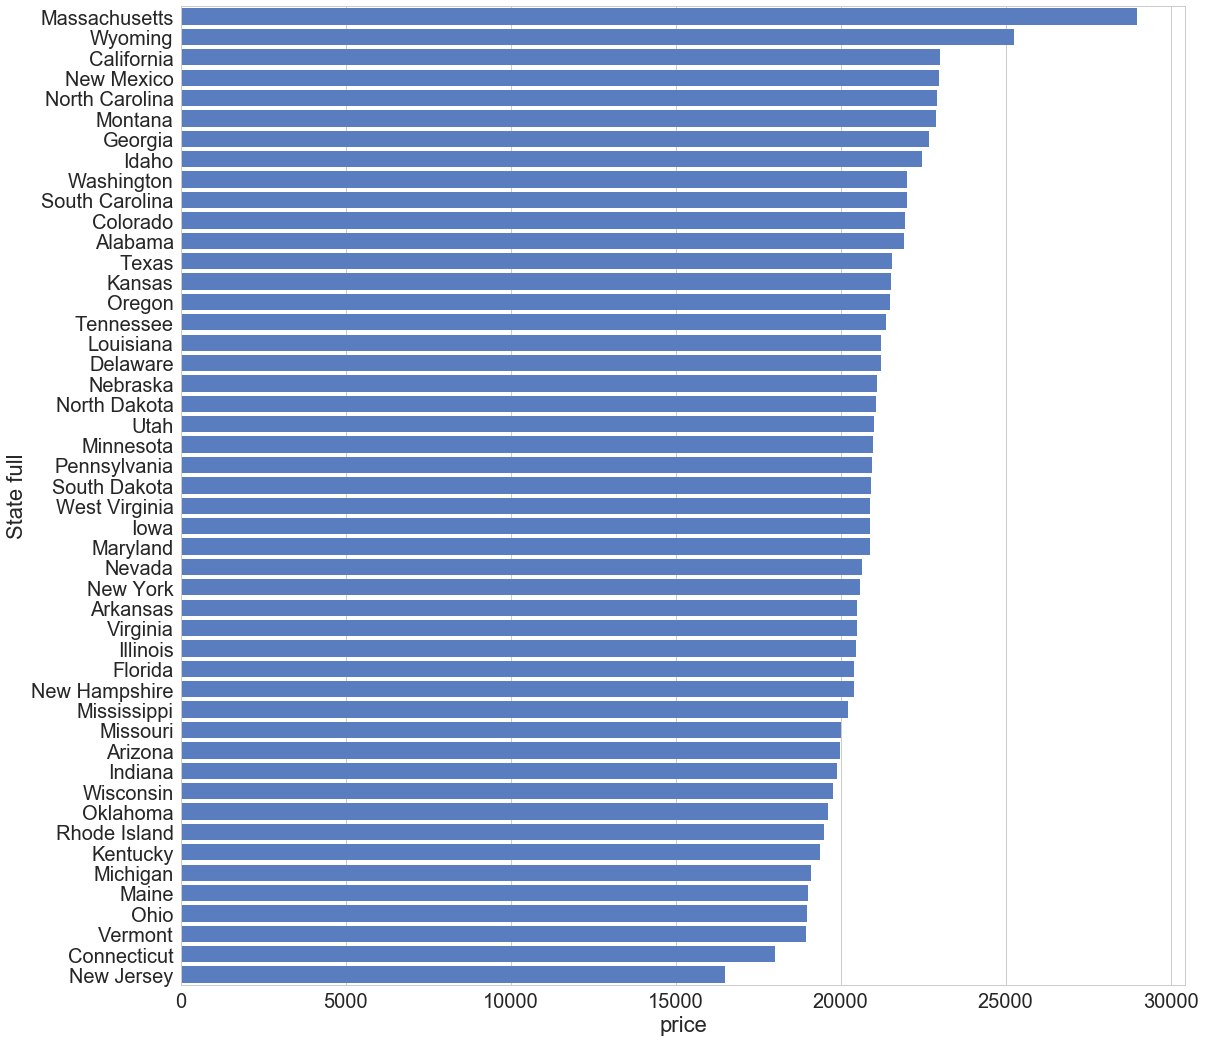

In [77]:
sns.set_color_codes("muted")
suv.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=suv, label="Median", color="b")

## Car Median price by State

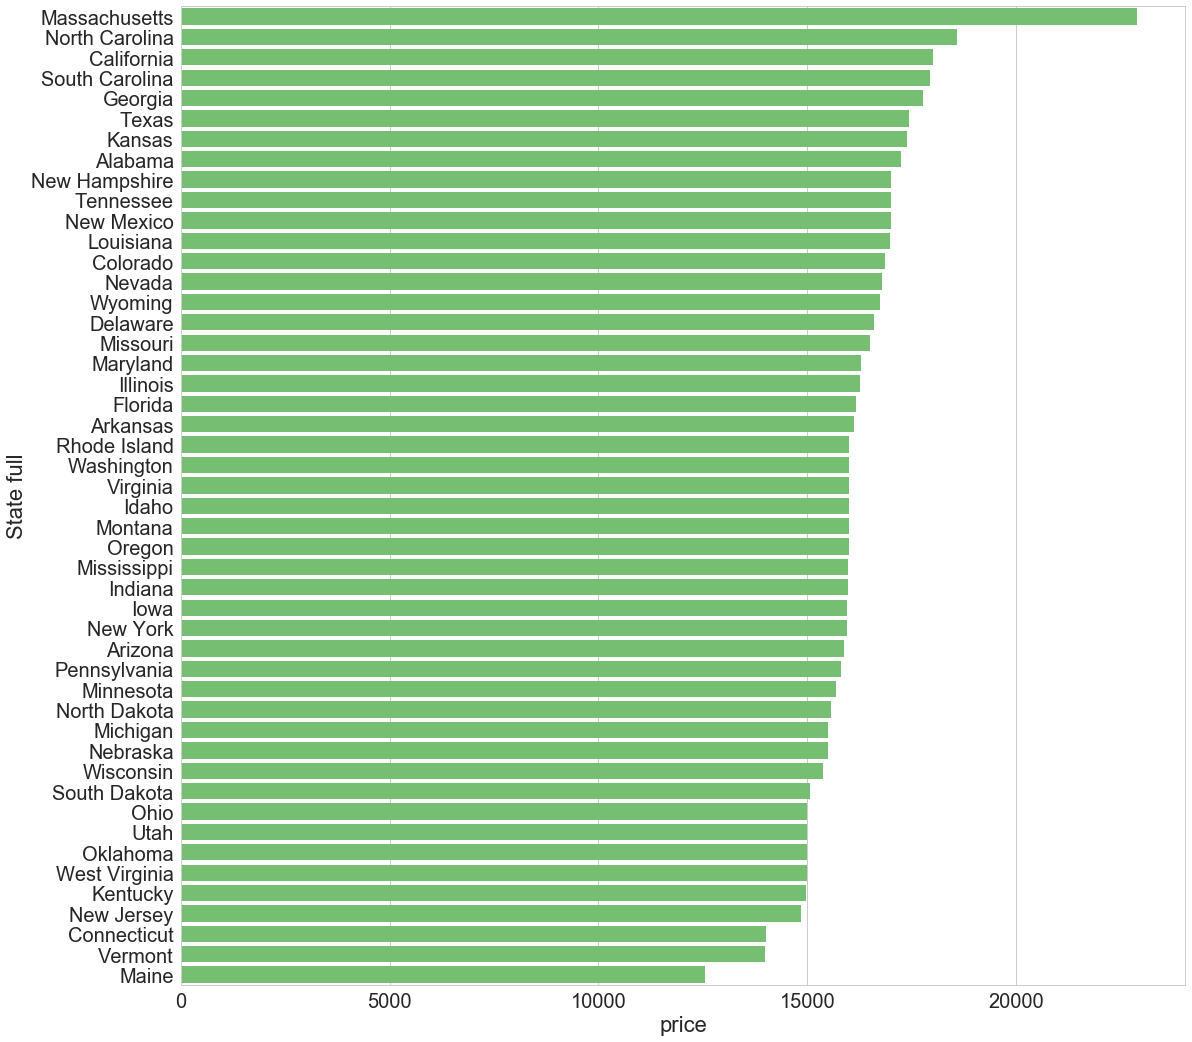

In [80]:
car.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=car, label="Median", color="g")

## Truck Median price by State

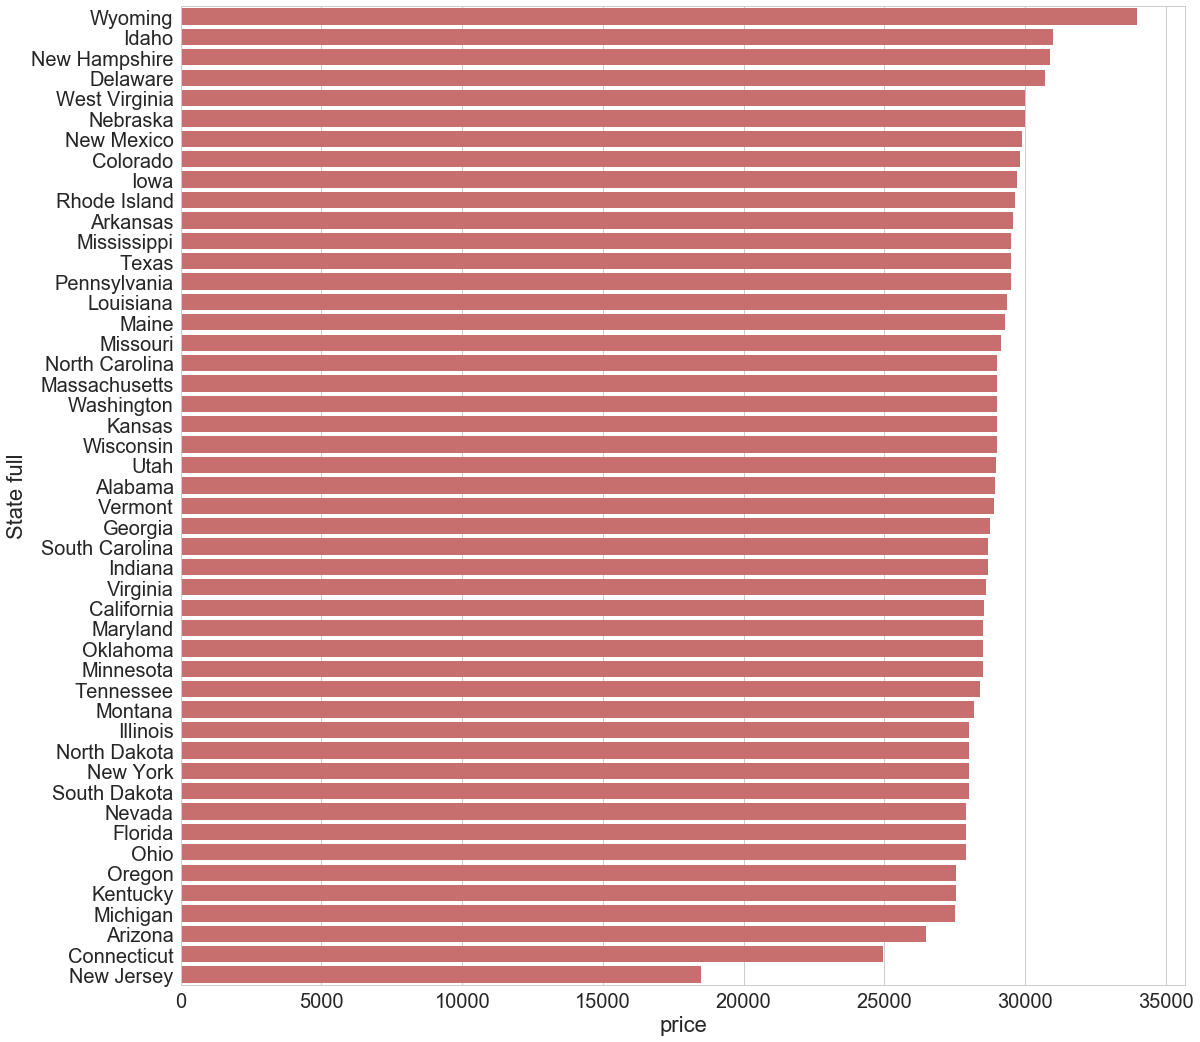

In [81]:
truck.sort_values('price', ascending=False, inplace=True)
sns.barplot(x="price", y="State full", data=truck, label="Median", color="r")

In [85]:
statemake = pd.DataFrame(df.groupby(['State full', 'make']).median())
statemake = statemake.reset_index()

## Heatmap of Median price of State and Make
These next few heatmaps are just the some map in various colors.

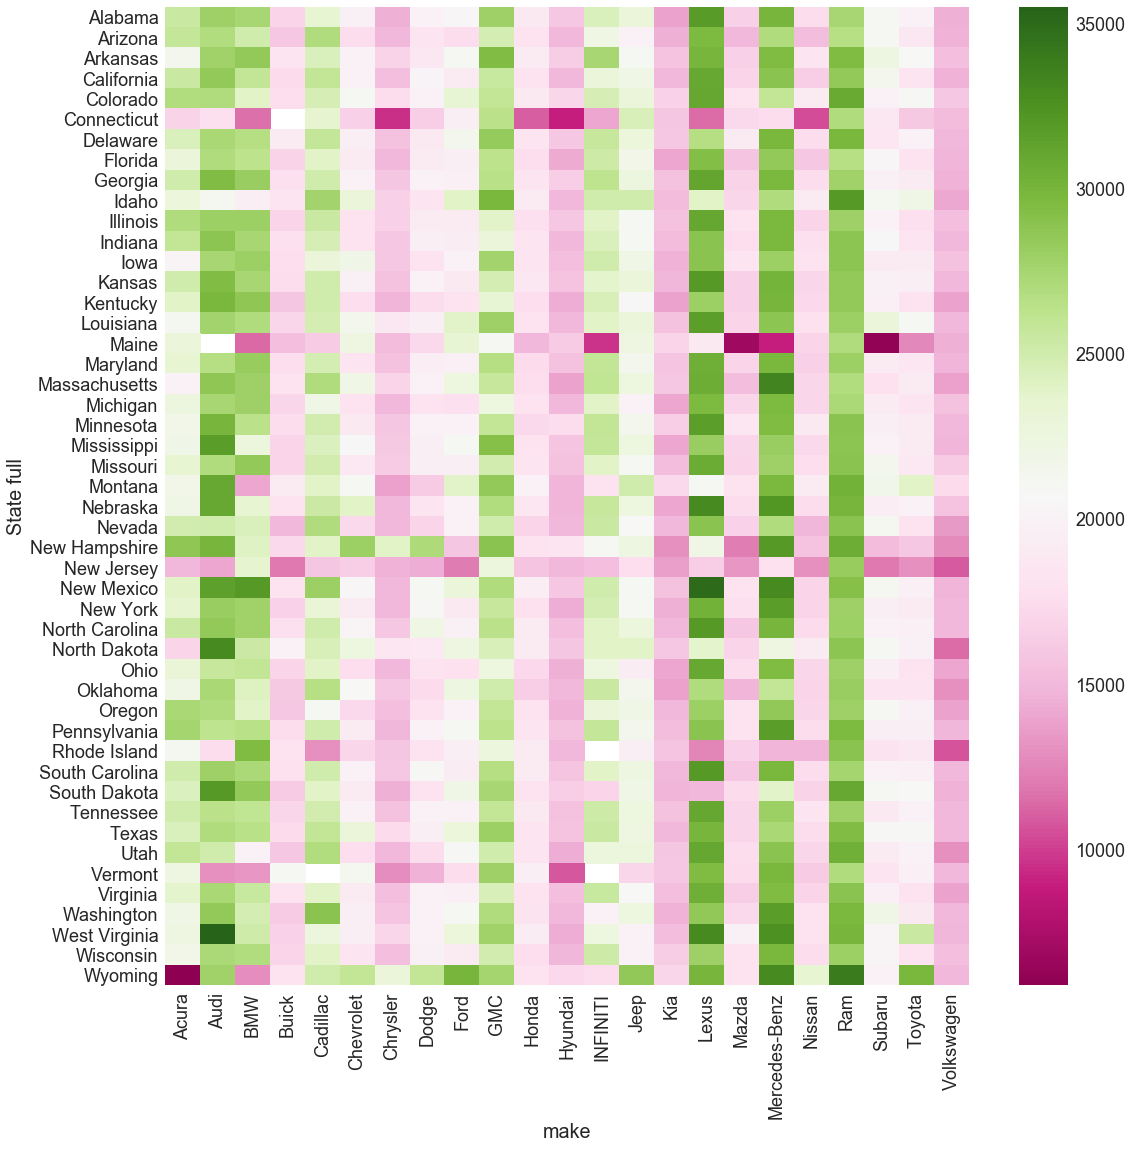

In [86]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("State full", "make", "price")
sns.heatmap(heaty, cmap="PiYG")#center=heaty.loc["Alabama", "Acura"])

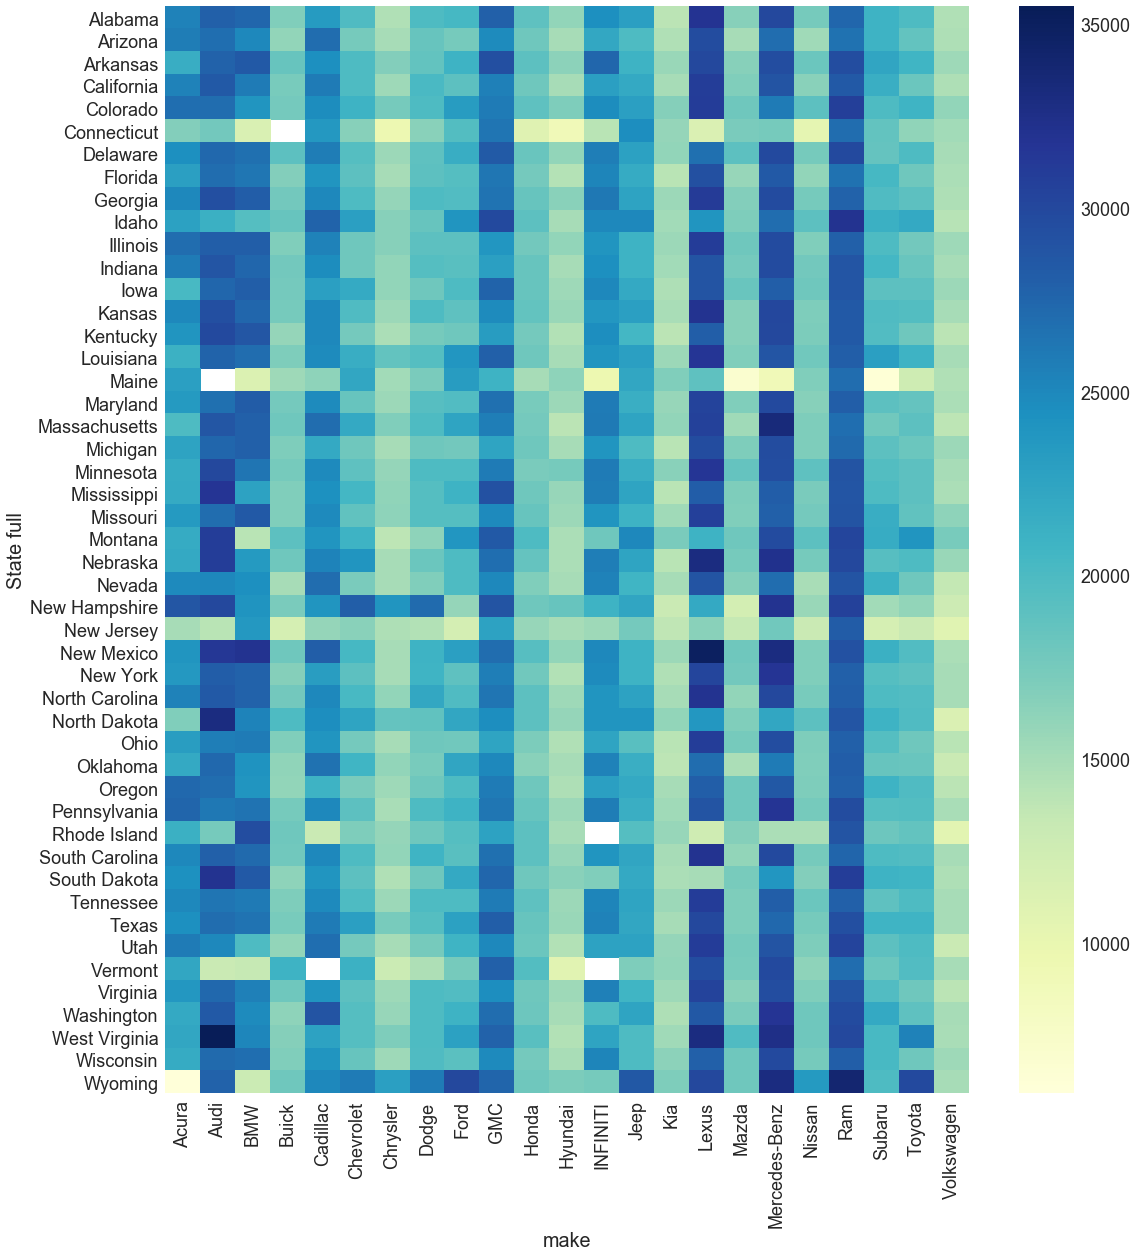

In [87]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 20))
heaty = statemake.pivot("State full", "make", "price")
sns.heatmap(heaty, cmap="YlGnBu")

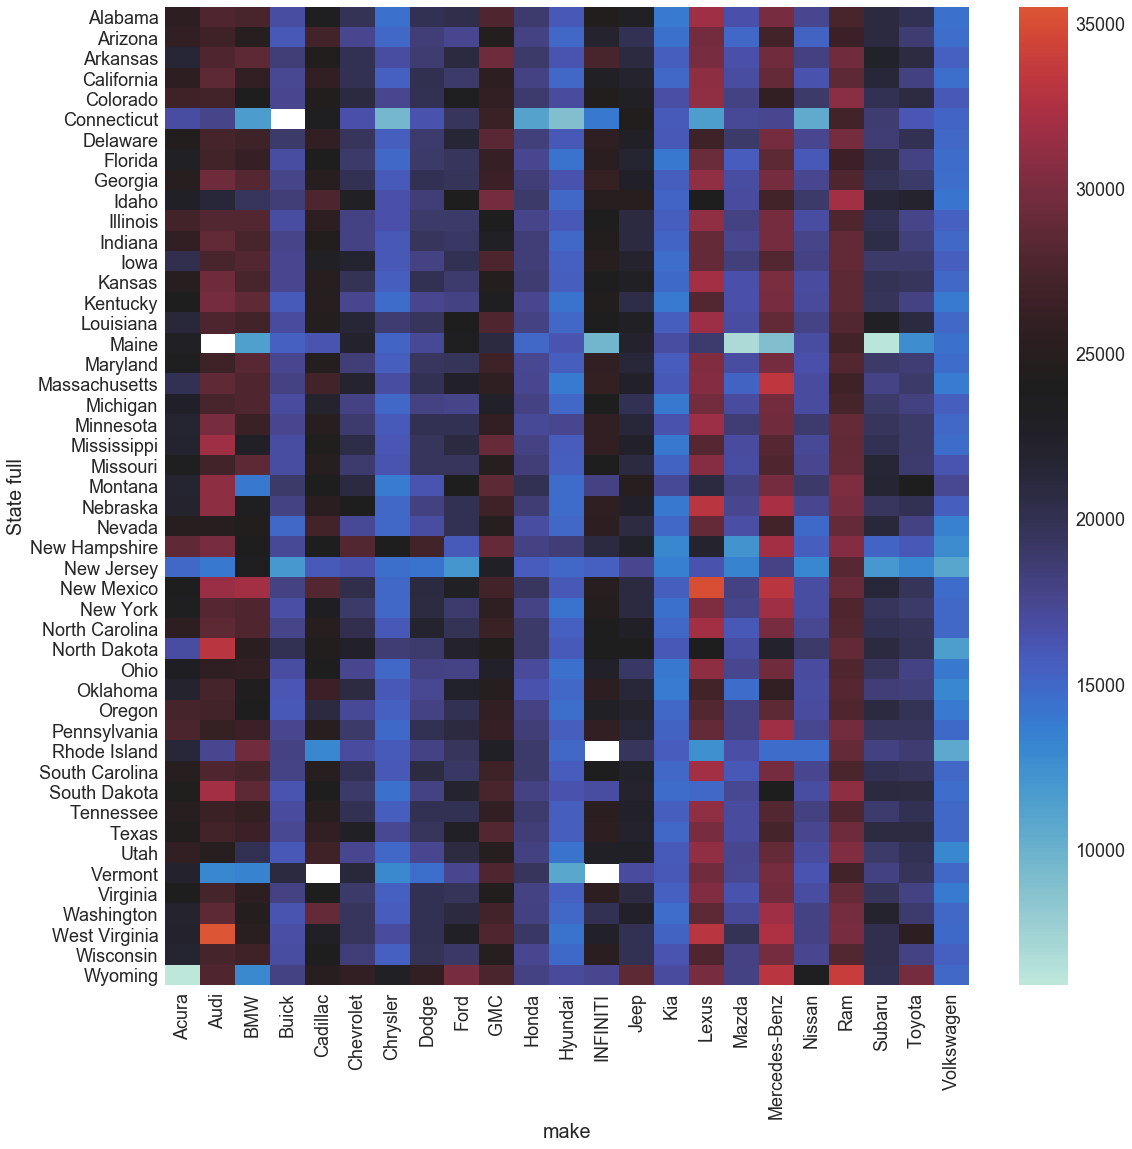

In [88]:
sns.set(style="whitegrid", font_scale=1.8)
f, ax = plt.subplots(figsize=(18, 18))
heaty = statemake.pivot("State full", "make", "price")
sns.heatmap(heaty, center=24000)

In [89]:
df[df["State full"] == "Maine"]["make"].value_counts().sort_values(ascending = False)

Ford             96
Chevrolet        52
Jeep             27
Hyundai          26
Kia              22
Nissan           21
GMC              20
Subaru           20
Toyota           18
Honda            16
Dodge            10
Volkswagen        9
Acura             8
Mazda             7
BMW               6
Ram               5
Chrysler          4
Buick             4
Lexus             3
INFINITI          2
Cadillac          2
Mercedes-Benz     1
Name: make, dtype: int64

In [189]:
# pip install plotly

import plotly
plotly.offline.init_notebook_mode()

#for col in df.columns:
#    df[col] = df[col].astype(str)

statesmedian = pd.DataFrame(df.groupby('state').mean())
statesmedian = statesmedian.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used vehicle listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [204]:
#Tried to check used car "devaluation" by taking msrp and subtracting the price. Didn't show much interesting, though.
#statesmedian['devaluation'] = statesmedian['msrp'] - statesmedian['price']
statesmedian.sort_values('state', ascending=True, inplace=True)
statesmedian.head(50)

state       AGE  Number of households    Population  cylinders  \
0     AL  4.617073          1.730540e+05  4.415933e+05   5.495046   
1     AR  4.380968          8.118962e+04  2.096970e+05   5.605175   
2     AZ  4.913483          1.012092e+06  2.774641e+06   5.389146   
3     CA  4.458796          1.059093e+06  3.217446e+06   5.161456   
4     CO  5.267442          1.658643e+05  4.324001e+05   5.596546   
5     CT  5.882267          2.218612e+05  5.840236e+05   5.077035   
6     DE  4.453881          1.270743e+05  3.427530e+05   5.271292   
7     FL  4.458968          3.798575e+05  1.033232e+06   5.260729   
8     GA  4.444396          1.840300e+05  5.299329e+05   5.414052   
9     IA  5.185674          5.907840e+04  1.487518e+05   5.907347   
10    ID  5.190331          6.149100e+04  1.647633e+05   5.990727   
11    IL  4.855973          6.415859e+05  1.736511e+06   5.437094   
12    IN  4.844953          1.040621e+05  2.702451e+05   5.445320   
13    KS  4.633895          1.578515e+05  4.048092e+05   5.460815   
14    KY  4.962259          1.287713e+05  3.173450e+05   5.455553   
15    LA  4.572113          9.208371e+04  2.429309e+05   6.019050   
16    MA  4.181793          2.771819e+05  7.199648e+05   5.139034   
17    MD  4.609683          1.987774e+05  5.382184e+05   5.234909   
18    ME  5.195251          7.253610e+04  1.762677e+05   5.572559   
19    MI  4.921206          2.219258e+05  5.728483e+05   5.537137   
20    MN  4.941523          1.999659e+05  4.956852e+05   5.600545   
21    MO  4.752385          1.661108e+05  4.153731e+05   5.464218   
22    MS  4.615789          3.552823e+04  9.705749e+04   5.780332   
23    MT  5.860061          3.712100e+04  9.118857e+04   6.291768   
24    NC  4.426868          2.069697e+05  5.399315e+05   5.332254   
25    ND  5.258259          2.896463e+04  6.954104e+04   6.196783   
26    NE  5.413824          8.206515e+04  2.101082e+05   6.108051   
27    NH  4.754026          1.249939e+05  3.251427e+05   5.532943   
28    NJ  6.318817          2.202577e+05  6.048486e+05   5.271159   
29    NM  4.734363          1.223327e+05  3.127695e+05   5.575380   
30    NV  5.137570          6.211667e+05  1.726544e+06   5.323240   
31    NY  4.503116          2.939265e+05  7.902727e+05   5.213894   
32    OH  4.888920          2.164348e+05  5.364110e+05   5.325198   
33    OK  5.040807          1.526449e+05  3.913937e+05   5.919210   
34    OR  5.352062          1.539314e+05  3.915126e+05   5.334820   
35    PA  4.673740          2.030276e+05  5.260592e+05   5.266639   
36    RI  4.100671          2.378000e+05  6.274690e+05   5.062640   
37    SC  4.531988          1.159646e+05  2.950507e+05   5.394873   
38    SD  5.865827          3.195976e+04  8.165074e+04   6.223696   
39    TN  4.663598          9.959097e+04  2.649550e+05   5.455218   
40    TX  4.537036          4.927785e+05  1.412737e+06   5.752144   
41    UT  4.973755          1.669962e+05  5.269070e+05   5.540037   
42    VA  4.781646          1.211979e+05  3.394996e+05   5.325897   
43    VT  4.858824          5.175356e+04  1.300200e+05   5.170588   
44    WA  5.437237          3.172877e+05  8.125804e+05   5.481483   
45    WI  4.761015          1.252724e+05  3.130160e+05   5.412817   
46    WV  4.396591          3.562523e+04  8.648611e+04   5.511399   
47    WY  5.242741          1.803564e+04  4.575069e+04   6.463201   

    decommissioned         dom     dom_180  dom_active     doors     ...       \
0         0.000000   93.537561   59.070315   50.294595  3.862798     ...        
1         0.000000  107.602051   62.195050   53.621035  3.869112     ...        
2         0.000902   88.718128   57.723061   51.225017  3.824078     ...        
3         0.000178   75.811697   51.728222   46.315327  3.843792     ...        
4         0.000000   90.689272   58.975259   50.187702  3.885079     ...        
5         0.000000  105.518895   81.559593   66.258721  3.863372     ...        
6         0.000000  105.583932   75.071387   65.244552

In [ ]:
statemedian['income'] = [44765, ]

In [207]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['Population'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Population of states in the continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [197]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['devaluation'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean devaluation of used vehicle listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [164]:
df['price'].mean()

22037.710272338598

In [165]:
car['price'].mean()

16210.0625

In [166]:
truck['price'].mean()

28680.916666666668

In [167]:
suv['price'].mean()

21011.53125

In [163]:
statesmedian.head(50)

state       AGE  Number of households    Population  cylinders  \
0     AL  4.617073          1.730540e+05  4.415933e+05   5.495046   
1     AR  4.380968          8.118962e+04  2.096970e+05   5.605175   
2     AZ  4.913483          1.012092e+06  2.774641e+06   5.389146   
3     CA  4.458796          1.059093e+06  3.217446e+06   5.161456   
4     CO  5.267442          1.658643e+05  4.324001e+05   5.596546   
5     CT  5.882267          2.218612e+05  5.840236e+05   5.077035   
6     DE  4.453881          1.270743e+05  3.427530e+05   5.271292   
7     FL  4.458968          3.798575e+05  1.033232e+06   5.260729   
8     GA  4.444396          1.840300e+05  5.299329e+05   5.414052   
9     IA  5.185674          5.907840e+04  1.487518e+05   5.907347   
10    ID  5.190331          6.149100e+04  1.647633e+05   5.990727   
11    IL  4.855973          6.415859e+05  1.736511e+06   5.437094   
12    IN  4.844953          1.040621e+05  2.702451e+05   5.445320   
13    KS  4.633895          1.578515e+05  4.048092e+05   5.460815   
14    KY  4.962259          1.287713e+05  3.173450e+05   5.455553   
15    LA  4.572113          9.208371e+04  2.429309e+05   6.019050   
16    MA  4.181793          2.771819e+05  7.199648e+05   5.139034   
17    MD  4.609683          1.987774e+05  5.382184e+05   5.234909   
18    ME  5.195251          7.253610e+04  1.762677e+05   5.572559   
19    MI  4.921206          2.219258e+05  5.728483e+05   5.537137   
20    MN  4.941523          1.999659e+05  4.956852e+05   5.600545   
21    MO  4.752385          1.661108e+05  4.153731e+05   5.464218   
22    MS  4.615789          3.552823e+04  9.705749e+04   5.780332   
23    MT  5.860061          3.712100e+04  9.118857e+04   6.291768   
24    NC  4.426868          2.069697e+05  5.399315e+05   5.332254   
25    ND  5.258259          2.896463e+04  6.954104e+04   6.196783   
26    NE  5.413824          8.206515e+04  2.101082e+05   6.108051   
27    NH  4.754026          1.249939e+05  3.251427e+05   5.532943   
28    NJ  6.318817          2.202577e+05  6.048486e+05   5.271159   
29    NM  4.734363          1.223327e+05  3.127695e+05   5.575380   
30    NV  5.137570          6.211667e+05  1.726544e+06   5.323240   
31    NY  4.503116          2.939265e+05  7.902727e+05   5.213894   
32    OH  4.888920          2.164348e+05  5.364110e+05   5.325198   
33    OK  5.040807          1.526449e+05  3.913937e+05   5.919210   
34    OR  5.352062          1.539314e+05  3.915126e+05   5.334820   
35    PA  4.673740          2.030276e+05  5.260592e+05   5.266639   
36    RI  4.100671          2.378000e+05  6.274690e+05   5.062640   
37    SC  4.531988          1.159646e+05  2.950507e+05   5.394873   
38    SD  5.865827          3.195976e+04  8.165074e+04   6.223696   
39    TN  4.663598          9.959097e+04  2.649550e+05   5.455218   
40    TX  4.537036          4.927785e+05  1.412737e+06   5.752144   
41    UT  4.973755          1.669962e+05  5.269070e+05   5.540037   
42    VA  4.781646          1.211979e+05  3.394996e+05   5.325897   
43    VT  4.858824          5.175356e+04  1.300200e+05   5.170588   
44    WA  5.437237          3.172877e+05  8.125804e+05   5.481483   
45    WI  4.761015          1.252724e+05  3.130160e+05   5.412817   
46    WV  4.396591          3.562523e+04  8.648611e+04   5.511399   
47    WY  5.242741          1.803564e+04  4.575069e+04   6.463201   

    decommissioned         dom     dom_180  dom_active     doors  engine_size  \
0         0.000000   93.537561   59.070315   50.294595  3.862798     3.281389   
1         0.000000  107.602051   62.195050   53.621035  3.869112     3.425352   
2         0.000902   88.718128   57.723061   51.225017  3.824078     3.202370   
3         0.000178   75.811697   51.728222   46.315327  3.843792     2.963285   
4         0.000000   90.689272   58.975259   50.187702  3.885079     3.426434   
5         0.000000  105.518895   81.559593   66.258721  3.863372     2.885756   
6         0.000000  105.583932   75.071387   65.244552

In [192]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
#scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
#            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['AGE'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "years")
        ) ]

layout = dict(
        title = 'Mean age of used vehicle listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [208]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['miles'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Miles")
        ) ]

layout = dict(
        title = 'Mean Miles of used vehicle listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [98]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesmedian['state'],
        z = statesmedian['msrp'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "years")
        ) ]

layout = dict(
        title = 'Mean MSRP of used car listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )

plotly.offline.iplot(fig, filename='d3-cloropleth-map')

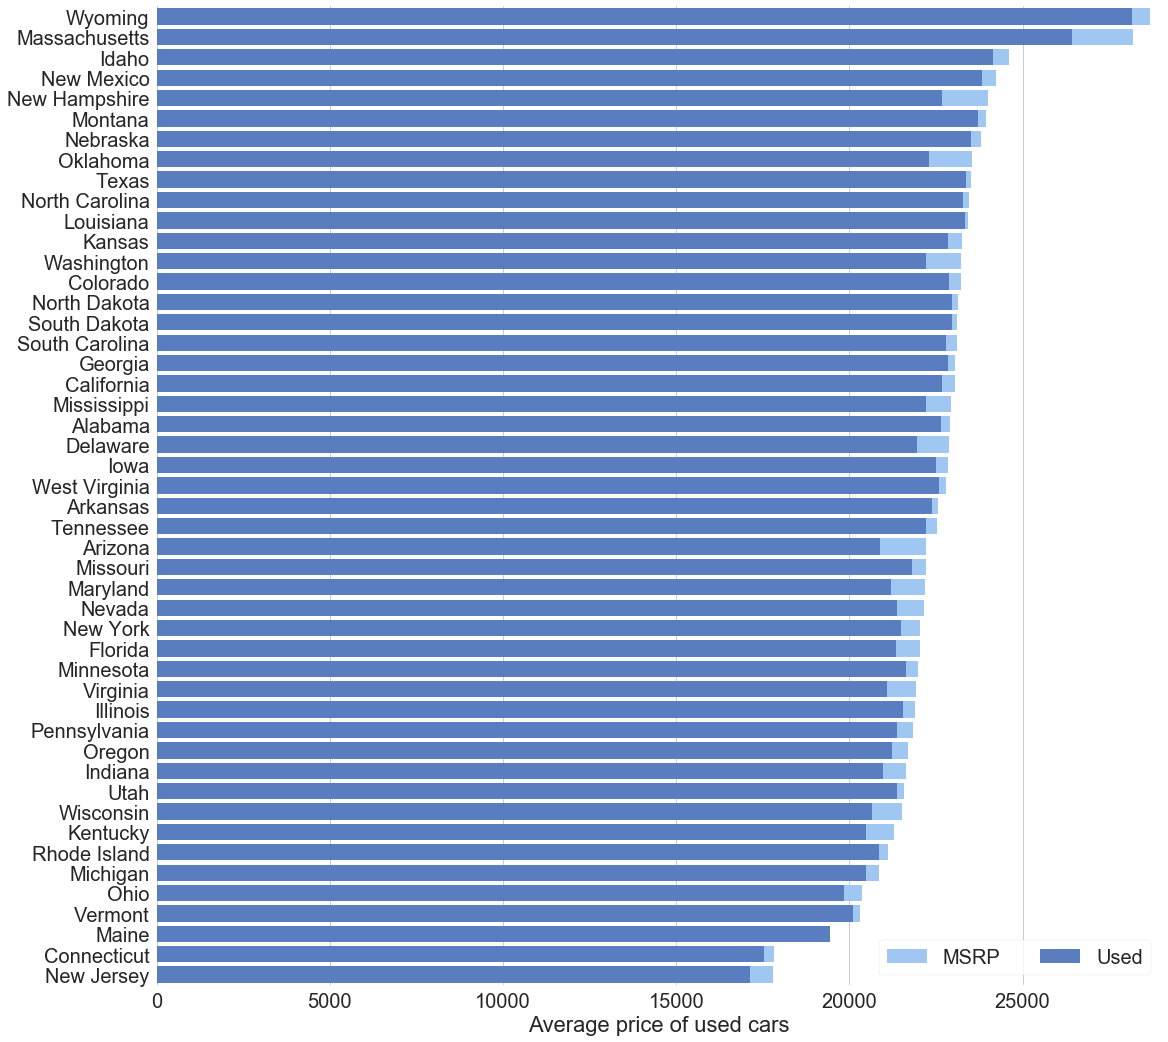

In [104]:
fullstatesmean = pd.DataFrame(df.groupby('State full').mean())
fullstatesmean = fullstatesmean.reset_index()
fullstatesmean.sort_values('msrp', ascending=False, inplace=True)

sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(18, 18))
sns.set_color_codes("pastel")
sns.barplot(x="msrp", y="State full", data=fullstatesmean, label="MSRP", color="b")

sns.set_color_codes("muted")
sns.barplot(x="price", y="State full", data=fullstatesmean, label="Used", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,29000), ylabel="", xlabel="Average price of used cars")
sns.despine(left=True, bottom=True)

## The most popular vehicle, an analysis

In [127]:
mostpopcar = df[(df["model"] == "Silverado 1500")]
mostpoptruck = df[(df["model"] == "F-150")]

In [128]:
mostpopcar["year"].value_counts().sort_values(ascending = False)

2015.0    15120
2016.0    10548
2017.0     8228
2014.0     7395
2013.0     3528
2011.0     2451
2012.0     2196
2010.0     1085
2009.0     1044
2008.0      986
2007.0      652
2006.0      553
2005.0      439
2004.0      296
2018.0      249
2003.0      168
2002.0       90
2001.0       57
2000.0       56
Name: year, dtype: int64

In [129]:
mostpoptruck["year"].value_counts().sort_values(ascending = False)

2015.0    14524
2016.0    13347
2014.0     7851
2013.0     5288
2012.0     2320
2011.0     1917
2010.0     1739
2017.0     1292
2007.0      775
2009.0      737
2008.0      718
2006.0      578
2004.0      397
2005.0      389
2018.0      230
2003.0      201
2002.0      125
2001.0      107
2000.0       27
1997.0       18
1998.0       13
1996.0        3
1994.0        3
1992.0        3
1991.0        2
1995.0        1
Name: year, dtype: int64

In [134]:
mostpopcar = mostpopcar[(mostpopcar["year"] == 2015.0)]

In [135]:
mostpoptruck = mostpoptruck[(mostpoptruck["year"] == 2015.0)]

In [136]:
mostpopcar.head()

AGE Median Family income Median Household income  Number of households  \
1475    4           $83,110.00              $67,721.00                 36781   
1564    4           $83,110.00              $67,721.00                 36781   
1577    4           $83,110.00              $67,721.00                 36781   
1621    4           $83,110.00              $67,721.00                 36781   
1637    4           $83,110.00              $67,721.00                 36781   

     Per Capita income  Population  Regions State full State short body_type  \
1475        $35,143.00       90842  MidWest   Missouri          MO    Pickup   
1564        $35,143.00       90842  MidWest   Missouri          MO    Pickup   
1577        $35,143.00       90842  MidWest   Missouri          MO    Pickup   
1621        $35,143.00       90842  MidWest   Missouri          MO    Pickup   
1637        $35,143.00       90842  MidWest   Missouri          MO    Pickup   

      ...   state           status_date         timezone  transmission  trim  \
1475  ...      MO  2018-09-23T22:30:58Z  America/Chicago     Automatic    LS   
1564  ...      MO  2018-09-24T04:35:32Z  America/Chicago     Automatic    LT   
1577  ...      MO  2018-09-24T04:01:05Z  America/Chicago     Automatic    LT   
1621  ...      MO  2018-09-24T02:15:53Z  America/Chicago     Automatic   LTZ   
1637  ...      MO  2018-09-24T04:46:24Z  America/Chicago     Automatic   LTZ   

          type  vehicle_type                vin    year    zip  
1475  STANDARD         Truck  1GCRCPEC9FZ284629  2015.0  64153  
1564  STANDARD         Truck  1GCVKREC3FZ302894  2015.0  64153  
1577  STANDARD         Truck  3GCUKREC0FG122350  2015.0  64153  
1621  STANDARD         Truck  3GCUKSEC2FG464681  2015.0  64153  
1637  STANDARD         Truck  3GCUKSEC1FG232606  2015.0  64153  

[5 rows x 46 columns]

In [137]:
mostpopcar["year"].value_counts().sort_values(ascending = False)

2015.0    15120
Name: year, dtype: int64

In [138]:
df["model"].value_counts().sort_values(ascending = False)

Silverado 1500         55141
F-150                  52605
CR-V                   35496
Accord                 34827
1500                   34434
Altima                 32471
Equinox                32163
Escape                 29718
Wrangler               29092
Camry                  27384
Civic                  26469
3 Series               24629
Rogue                  22358
Explorer               21012
Grand Cherokee         20668
RAV4                   20472
Sonata                 20468
RX 350                 20093
Fusion                 19430
Sierra 1500            18963
Corolla                17961
Malibu                 17424
Tacoma                 17284
Edge                   17030
Cherokee               16054
C-Class                15153
Cruze                  15019
Jetta                  14675
Highlander             14538
ES 350                 14269
                       ...  
i8                         1
SC 300                     1
Club Wagon                 1
Sprinter      

In [188]:
mostpopcarmean = pd.DataFrame(mostpopcar.groupby('state').mean())
mostpopcarmean = mostpopcarmean.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
#scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
#            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = mostpopcarmean['state'],
        z = mostpopcarmean['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used Silverado listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [148]:
mostpopcarmean = pd.DataFrame(mostpopcar.groupby('state').mean())
mostpopcarmean = mostpopcarmean.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = mostpopcarmean['state'],
        z = mostpopcarmean['msrp'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean MSRP of used Silverado listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [149]:
mostpoptruckmean = pd.DataFrame(mostpoptruck.groupby('state').mean())
mostpoptruckmean = mostpoptruckmean.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = mostpoptruckmean['state'],
        z = mostpoptruckmean['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used F-150 listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [159]:
#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = mostpoptruckmean['state'],
        z = mostpoptruckmean['msrp'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean MSRP of used F-150 listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [146]:
accord = df[(df["model"] == "Accord")]
accord = accord[(accord["year"] == 2016.0)]

In [152]:
accord = pd.DataFrame(accord.groupby('state').mean())
accord = accord.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = accord['state'],
        z = accord['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used Accord listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')

In [185]:
vtypes = pd.DataFrame(df.groupby('vehicle_type').mean())
vtypes = vtypes.reset_index()
vtypes = vtypes.drop(vtypes[vtypes["vehicle_type"] == "Multipurpose Passenger Vehicle (Mpv)"].index | vtypes[vtypes["vehicle_type"] == "Van"].index)
vtypes.head()

vehicle_type       AGE  Number of households     Population  cylinders  \
0          Car  4.626642         355034.278995  995339.065526   4.782300   
2          SUV  4.495565         300244.081610  831306.580430   5.336752   
3        Truck  5.309643         228157.808165  631378.207560   7.354208   

   decommissioned         dom    dom_180  dom_active     doors  engine_size  \
0        0.000034   87.412308  55.765994   48.851775  3.739079     2.635806   
2        0.000020   85.436024  58.461394   50.935264  3.976692     3.130969   
3        0.000004  107.774092  67.972048   57.050698  3.913277     4.967559   

   irs_estimated_population_2015  is_certified   latitude  longitude  \
0                   31649.731402      0.321990  36.699231 -89.695022   
2                   30378.200064      0.309725  37.175129 -88.736392   
3                   27730.396824      0.205074  37.479610 -90.426351   

          miles          msrp         price         year           zip  
0  46653.309119  19018.720263  18592.124413  2014.373358  47858.447700  
2  51742.739216  23478.377087  23003.825672  2014.504435  46752.257734  
3  62411.732648  29027.885831  28520.831578  2013.690357  50860.027341

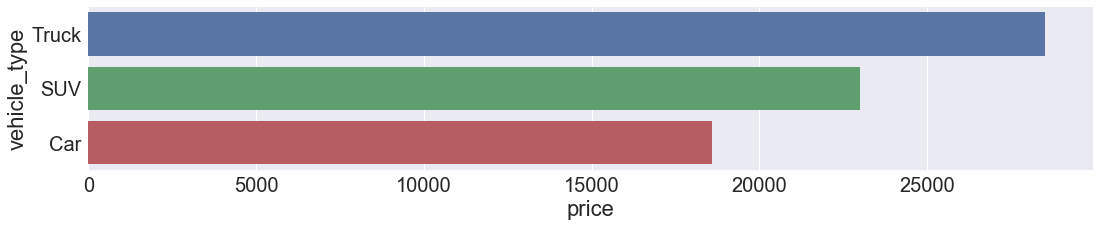

In [187]:
vtypes.sort_values('price', ascending=False, inplace=True)
sns.set(font_scale=2, rc={'figure.figsize':(18, 3)})
sns.barplot(x="price", y="vehicle_type", data=vtypes, label="Median")

In [193]:
nc = df[(df["State full"] == "North Carolina")]
nc["county full"].value_counts().sort_values(ascending = False)

Mecklenburg County     53448
Wake County            27068
Cabarrus County        16613
Durham County          13987
Cumberland County       9701
Orange County           7729
Catawba County          6918
Guilford County         6500
Pitt County             6338
Union County            5186
New Hanover County      4752
Forsyth County          3893
Iredell County          1363
Moore County            1326
Watauga County          1288
Alamance County         1212
Lee County               994
Gaston County            984
Wayne County             981
Buncombe County          929
Craven County            648
Rowan County             599
Robeson County           561
Pasquotank County        541
Johnston County          508
Henderson County         476
Wilson County            469
Wilkes County            421
Rockingham County        378
Lenoir County            355
                       ...  
Stanly County             59
Chatham County            59
Franklin County           55
Macon County  

In [194]:
df["State full"].value_counts().sort_values(ascending = False)

North Carolina    181042
Florida           130070
California        129212
Texas             118210
Georgia            84958
Pennsylvania       79167
New York           72363
Ohio               71003
Virginia           67638
Illinois           57045
Michigan           50892
South Carolina     50206
Wisconsin          48639
Tennessee          45297
Maryland           42012
Indiana            35415
Missouri           35115
Kansas             24971
Washington         24680
Minnesota          24591
Kentucky           24456
Alabama            23921
Colorado           23564
Iowa               19028
Arizona            16621
Oklahoma           14581
Nebraska           14308
Oregon             13455
Arkansas           12484
Utah               11964
Mississippi        10830
Louisiana          10026
Delaware            8489
Nevada              8025
Idaho               6578
West Virginia       4869
South Dakota        4524
New Mexico          4013
Massachusetts       3625
North Dakota        3481


In [202]:
crv = df[(df["model"] == "CR-V")]
crv = crv[(crv["year"] == 2015.0)]
crv = pd.DataFrame(mostpopcar.groupby('state').mean())
crv = crv.reset_index()

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
#scl = [[0.0, 'rgb(0,0,255)'],[0.2, 'rgb(102,0,255)'],[0.4, 'rgb(204,0,255)'],\
#            [0.6, 'rgb(255,0,204)'],[0.8, 'rgb(255,0,102)'],[1.0, 'rgb(255,0,0)']]
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(102,255,0)'],[0.4, 'rgb(204,255,0)'],\
            [0.6, 'rgb(255,204,0)'],[0.8, 'rgb(255,102,0)'],[1.0, 'rgb(255,0,0)']]

#df['text'] = df['state'] + '<br>' +\
#    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#    'Wheat '+df['wheat']+' Corn '+df['corn']

data =[ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = crv['state'],
        z = crv['price'],#.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Mean price of used CR-V listing in continental USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
#py.iplot( fig, filename='d3-cloropleth-map' )
plotly.offline.iplot(fig, filename='d3-cloropleth-map')